In [6]:
from tambo_diffusion_generator import TamboDiffusionGenerator

# Initialize with custom parameters
generator = TamboDiffusionGenerator(
        checkpoint_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_ckpts/diffusion/ckpt_epoch=1999.ckpt",
        output_dir="diffusion_model/run_3",
        tambo_optimization_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_optimization",
        device="cuda:0",
    )

Initialized TamboDiffusionGenerator
Device: cuda:0
Output directory: diffusion_model/run_3


In [7]:
# Run each step manually
generator.load_model()

Loaded checkpoint: /n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_ckpts/diffusion/ckpt_epoch=1999.ckpt
Model set to eval mode.
DDIM sampler built (ddim_steps=100, eta=0.0)
Model loading time: 1.38s


In [8]:
generator.setup_data()

Sample image shape: torch.Size([3, 32, 32])
Total samples: 46942
Test dataloader ready. Number of batches: 37


In [9]:
generator.extract_test_samples(num_conditions=20)

Collected 20 conditioning vectors.
First conditioning vector (cpu): tensor([ 1.4296,  0.8087,  0.6604,  1.3828, -0.3484])


In [10]:
outputs = generator.generate_samples(num_samples=1, num_conditions=10, chunk_size=100)

Starting generation for condition 1/10
Condition (cpu): tensor([ 1.4296,  0.8087,  0.6604,  1.3828, -0.3484])


Condition 1/10: 1/1 samples done
Concatenated generated images for condition 1: torch.Size([1, 3, 32, 32])
Finished condition 1/10
Starting generation for condition 2/10
Condition (cpu): tensor([-1.2677,  0.1276, -1.0384, -0.8355, -1.1359])
Condition 2/10: 1/1 samples done
Concatenated generated images for condition 2: torch.Size([1, 3, 32, 32])
Finished condition 2/10
Starting generation for condition 3/10
Condition (cpu): tensor([ 0.1084, -1.4165,  1.3894,  0.9300,  1.0704])
Condition 3/10: 1/1 samples done
Concatenated generated images for condition 3: torch.Size([1, 3, 32, 32])
Finished condition 3/10
Starting generation for condition 4/10
Condition (cpu): tensor([-0.0890,  1.1705,  0.1145,  0.1644,  1.4007])
Condition 4/10: 1/1 samples done
Concatenated generated images for condition 4: torch.Size([1, 3, 32, 32])
Finished condition 4/10
Starting generation for condition 5/10
Condition (cpu): tensor([ 0.4793, -0.5986, -1.2575, -1.3813,  0.2684])
Condition 5/10: 1/1 samples done
Con

energy: 1.429570198059082
sin_z: 0.8087248802185059
cos_z: 0.6604409217834473
sin_a: 1.3828048706054688
cos_a: -0.34841758012771606


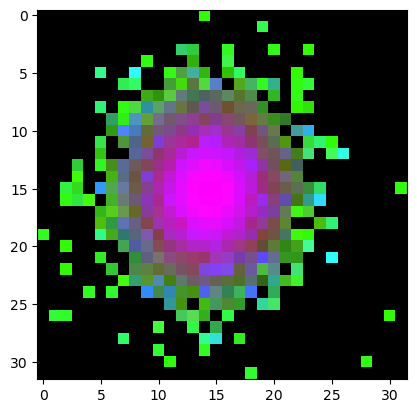

In [11]:
import matplotlib.pyplot as plt


for output in outputs:
    condition_name = [ 'energy', 'sin_z', 'cos_z', 'sin_a', 'cos_a' ]
    for icondition, condition in enumerate(output['condition']):
        print(f"{condition_name[icondition]}: {condition}")

    output_mean = output['images'].mean(dim=0)
    output_mean = output_mean.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C) if needed
    # normalize between 0 and 1
    output_mean = (output_mean - output_mean.min()) / (output_mean.max() - output_mean.min())
    plt.imshow(output_mean.cpu(), cmap='viridis') 
    plt.show()
    break

In [13]:
output_mean.shape

torch.Size([32, 32, 3])

In [14]:
import torch
# Get mean value at each spatial location across channels
location_means = torch.mean(output_mean, dim=2)

In [15]:
# Create position grids
i_indices = torch.arange(32, dtype=torch.float32)
j_indices = torch.arange(32, dtype=torch.float32)
i_grid, j_grid = torch.meshgrid(i_indices, j_indices, indexing='ij')

# Calculate position-weighted mean coefficients
coeff_i = torch.sum(i_grid * location_means) / torch.sum(location_means)
coeff_j = torch.sum(j_grid * location_means) / torch.sum(location_means)

print(f"Mean coefficient in 1st dimension: {coeff_i.item()}")
print(f"Mean coefficient in 2nd dimension: {coeff_j.item()}")


Mean coefficient in 1st dimension: 15.451632499694824
Mean coefficient in 2nd dimension: 14.128173828125
